In [14]:
import numpy as np
X_train = np.load("reshaped_14.npy")

In [15]:
hidden_nodes = 225
epochs = 100
lr = 1e-4
input_size = 196
X = X_train.reshape(60000,input_size)
X = X/255.0
samples = 60000
Lambda = 1
s = 0.05
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return (np.matmul(W.T,x.reshape(len(x),1)) + b)

W1 = np.random.normal(1e-5,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(1e-5,1,(hidden_nodes,1))
W2 = np.random.normal(1e-5,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(1e-5,1,(input_size,1))

In [16]:
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    Zm = Zd = Zdb = 0
    ZmM = np.zeros(W1.shape)
    for j in range(samples):
        #forward path
        out1 = layer(X[j],W1,Bi1)
        z = sigm(out1)
        out2 = layer(z,W2,Bi2)
        y = sigm(out2)
        # Backprop
        temp = 2*(y-X[j].reshape(np.shape(y)))*diff_sigm(out2)
        b2 += temp
        w2 += np.matmul(z,temp.T)
        loss += np.linalg.norm(y-X[j])**2
        S = np.random.binomial(1,s,(hidden_nodes,1))
        Z = z/samples
        ge = (-S/Z + (1-S)/(1-Z))
#         print(out1.shape, ge.shape)
        temp2 = np.multiply(diff_sigm(out1),((Lambda/samples)*(ge) - np.sum(temp)))
        b1 += temp2
        w1 += np.matmul(X[j].reshape(input_size,1),temp2.T)
    print(loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2


1000157064.2151601
561827517.632065
517065805.45155793
534283455.99885035
515498708.1819097
515466124.29700696
518909092.034063
515663914.8071559
522035834.63924336
506999394.13675886
507291128.04871994
507015033.0279594
507014056.08747447
507013086.73815507
507011911.76032937
507010170.4413524
507006943.4297665
506998479.8925212
506948566.0470452
500322302.16788125
498317644.2323205
498241585.7783126
507012003.99948287
507009976.32280356
507005545.9413815
506991128.2662191
506847010.2266282
498329792.94873554
498327168.0844963
498314761.8129931
499115210.3416957
498328852.23254985
498323559.1750756
498279241.0383174
507016721.8984977
507016745.11947614
507016727.6003462
507016687.64711374
507016634.67174655
507016573.5055355
507016506.5604301
507016434.9433218
507016359.0369493
507016278.8014867
507016193.92683387
507016103.9030355
507016008.0437154
507015905.47975945
507015795.1305777
507015675.6542584
507015545.3728546
507015402.1645307
507015243.30742395
507015065.25026435
50701486

In [4]:
import matplotlib.pyplot as plt

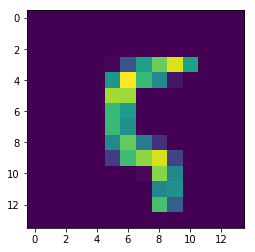

In [5]:
plt.imshow(X_train[100])

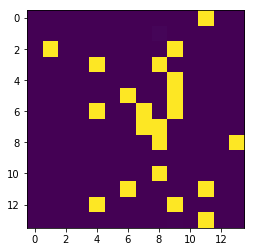

In [12]:
out1 = layer(X[51],W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y1 = sigm(out2)
y1 = y.reshape(14,14)
plt.imshow(y1)

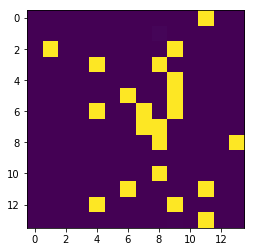

In [11]:
out1 = layer(X[551],W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y.reshape(14,14)
plt.imshow(y)

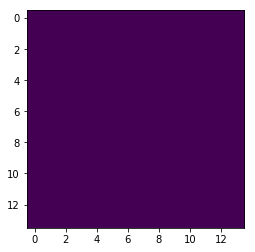

In [13]:
plt.imshow(y-y1)